In [1]:
import csv
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessClassifier

In [2]:
class data_objects:
    def __init__(self,clip_no,stime,etime,weights_data,label):
        self.clip_no = clip_no
        self.stime = stime
        self.etime = etime
        self.weights_data = weights_data
        self.label = label

In [3]:
total_data_objects = []
with open("E:\\Study\\Sem Project\\Data\\weight_motion_vector_data.csv",'r') as file:
    reader = csv.reader(file)
    for row in reader:
        #from csv file all items will be read as strings, so we have to convert to int if neccesary
        total_data_objects.append(data_objects(row[0],row[1],row[2],np.asarray(list(map(float,row[4:]))),int(row[3])))

In [4]:
#printing objects value.
print("total no of objects",len(total_data_objects))
for i in range(len(total_data_objects)):
    print("clip no=",total_data_objects[i].clip_no)
    print("start time=",total_data_objects[i].stime)
    print("end time=",total_data_objects[i].etime)
    print("weights =",total_data_objects[i].weights_data)
    print("label = ",total_data_objects[i].label,"\n")

total no of objects 1327
clip no= 1
start time= 0:00:00
end time= 0:00:02
weights = [0.23775831 0.21021411 0.23205344 ... 0.23086858 0.24774176 0.06312307]
label =  -1 

clip no= 2
start time= 0:00:02
end time= 0:00:04
weights = [0.23794439 0.21014059 0.23198968 ... 0.23168734 0.25006667 0.06248911]
label =  -1 

clip no= 3
start time= 0:00:04
end time= 0:00:06
weights = [0.23807687 0.21008745 0.23194458 ... 0.23159105 0.24978963 0.0625677 ]
label =  -1 

clip no= 4
start time= 0:00:06
end time= 0:00:08
weights = [0.23800665 0.21011415 0.23196906 ... 0.23087671 0.24815442 0.06269858]
label =  -1 

clip no= 5
start time= 0:00:08
end time= 0:00:10
weights = [0.23781919 0.21018927 0.23203291 ... 0.23163502 0.24996282 0.06248138]
label =  -1 

clip no= 6
start time= 0:00:10
end time= 0:00:12
weights = [0.23796546 0.21013004 0.23198338 ... 0.23159593 0.2499     0.06246012]
label =  -1 

clip no= 7
start time= 0:00:12
end time= 0:00:14
weights = [0.23802921 0.21010537 0.23196127 ... 0.230860

weights = [0.23795146 0.21013716 0.23198752 ... 0.23161468 0.24987593 0.06252918]
label =  1 

clip no= 115
start time= 0:03:48
end time= 0:03:50
weights = [0.23804168 0.21010004 0.23195717 ... 0.23036724 0.24637261 0.06347051]
label =  -1 

clip no= 116
start time= 0:03:50
end time= 0:03:52
weights = [0.23795208 0.21013579 0.23198776 ... 0.23061003 0.24726461 0.06306792]
label =  -1 

clip no= 117
start time= 0:03:52
end time= 0:03:54
weights = [0.23793337 0.21014416 0.23199379 ... 0.23133059 0.24928123 0.06251993]
label =  -1 

clip no= 118
start time= 0:03:54
end time= 0:03:56
weights = [0.23794752 0.21013743 0.23198938 ... 0.2313368  0.24928407 0.06253194]
label =  -1 

clip no= 119
start time= 0:03:56
end time= 0:03:58
weights = [0.23809829 0.21007788 0.23193768 ... 0.23175573 0.25016105 0.06254233]
label =  -1 

clip no= 120
start time= 0:03:58
end time= 0:04:00
weights = [0.23810391 0.21007526 0.23193589 ... 0.23087932 0.24821061 0.06264454]
label =  -1 

clip no= 121
start time

clip no= 180
start time= 0:05:58
end time= 0:06:00
weights = [0.23799686 0.21011868 0.23197216 ... 0.23174143 0.25020117 0.06246804]
label =  -1 

clip no= 181
start time= 0:06:00
end time= 0:06:02
weights = [0.23802337 0.21011017 0.23196226 ... 0.23180036 0.25032258 0.06247213]
label =  -1 

clip no= 182
start time= 0:06:02
end time= 0:06:04
weights = [0.23795447 0.2101337  0.2319874  ... 0.23139681 0.24902162 0.06294408]
label =  -1 

clip no= 183
start time= 0:06:04
end time= 0:06:06
weights = [0.2380542  0.21009767 0.2319518  ... 0.23108517 0.24859925 0.06269613]
label =  -1 

clip no= 184
start time= 0:06:06
end time= 0:06:08
weights = [0.23808327 0.2100849  0.23194236 ... 0.23176759 0.25025228 0.06247287]
label =  -1 

clip no= 185
start time= 0:06:08
end time= 0:06:10
weights = [0.23795721 0.21013574 0.23198517 ... 0.23172905 0.25014642 0.0624992 ]
label =  -1 

clip no= 186
start time= 0:06:10
end time= 0:06:12
weights = [0.2379643  0.21013002 0.23198396 ... 0.23178175 0.250283

weights = [0.23810624 0.21007457 0.23193504 ... 0.23172966 0.25004798 0.0626037 ]
label =  -1 

clip no= 254
start time= 0:08:26
end time= 0:08:28
weights = [0.23810136 0.21007885 0.23193571 ... 0.23086929 0.2480236  0.0628202 ]
label =  -1 

clip no= 255
start time= 0:08:28
end time= 0:08:30
weights = [0.23819169 0.21004075 0.23190568 ... 0.23179279 0.25010973 0.06267995]
label =  -1 

clip no= 256
start time= 0:08:30
end time= 0:08:32
weights = [0.2379442  0.21013921 0.23199032 ... 0.2305613  0.24732687 0.06286945]
label =  -1 

clip no= 257
start time= 0:08:32
end time= 0:08:34
weights = [0.23807465 0.21008709 0.23194581 ... 0.23180667 0.25034881 0.06245815]
label =  -1 

clip no= 258
start time= 0:08:34
end time= 0:08:36
weights = [0.23792194 0.21014859 0.23199774 ... 0.23169911 0.25008354 0.06249814]
label =  -1 

clip no= 259
start time= 0:08:36
end time= 0:08:38
weights = [0.23808812 0.21008125 0.23194142 ... 0.23183151 0.25040203 0.0624577 ]
label =  -1 

clip no= 260
start tim

start time= 0:10:30
end time= 0:10:32
weights = [0.23802419 0.21010663 0.23196334 ... 0.23105115 0.24867038 0.06254024]
label =  1 

clip no= 317
start time= 0:10:32
end time= 0:10:34
weights = [0.23792118 0.21015045 0.23199734 ... 0.23160353 0.2499118  0.0624647 ]
label =  1 

clip no= 318
start time= 0:10:34
end time= 0:10:36
weights = [0.23803821 0.21010141 0.23195834 ... 0.23165628 0.24998626 0.06250507]
label =  1 

clip no= 319
start time= 0:10:36
end time= 0:10:38
weights = [0.23792677 0.21014507 0.23199673 ... 0.23183808 0.25041676 0.06245685]
label =  -1 

clip no= 320
start time= 0:10:38
end time= 0:10:40
weights = [0.23803607 0.21010315 0.23195873 ... 0.23079309 0.24710457 0.06366513]
label =  -1 

clip no= 321
start time= 0:10:40
end time= 0:10:42
weights = [0.23796757 0.21012858 0.2319829  ... 0.23009963 0.2455039  0.0638115 ]
label =  -1 

clip no= 322
start time= 0:10:42
end time= 0:10:44
weights = [0.23805749 0.21009588 0.23195088 ... 0.23029906 0.24587487 0.06387317]
l

start time= 0:13:32
end time= 0:13:34
weights = [0.23805267 0.21009427 0.23195398 ... 0.23121753 0.24855207 0.06304181]
label =  -1 

clip no= 408
start time= 0:13:34
end time= 0:13:36
weights = [0.23800682 0.21011406 0.23196901 ... 0.23131922 0.24917985 0.06260405]
label =  -1 

clip no= 409
start time= 0:13:36
end time= 0:13:38
weights = [0.2380607  0.21009199 0.23195085 ... 0.23182775 0.2503944  0.06245739]
label =  -1 

clip no= 410
start time= 0:13:38
end time= 0:13:40
weights = [0.23804085 0.21010011 0.23195755 ... 0.23160367 0.24987935 0.06249972]
label =  -1 

clip no= 411
start time= 0:13:40
end time= 0:13:42
weights = [0.23797457 0.21012563 0.23198058 ... 0.23152296 0.24970645 0.06250173]
label =  -1 

clip no= 412
start time= 0:13:42
end time= 0:13:44
weights = [0.23801674 0.21010856 0.23196627 ... 0.2312534  0.2488022  0.06286324]
label =  -1 

clip no= 413
start time= 0:13:44
end time= 0:13:46
weights = [0.23792034 0.21014638 0.23199944 ... 0.23029223 0.24658555 0.06306107

clip no= 498
start time= 0:16:34
end time= 0:16:36
weights = [0.23796999 0.21012747 0.23198211 ... 0.2318297  0.25039861 0.06245724]
label =  1 

clip no= 499
start time= 0:16:36
end time= 0:16:38
weights = [0.23796242 0.21013191 0.23198409 ... 0.23170835 0.25012839 0.06247078]
label =  1 

clip no= 500
start time= 0:16:38
end time= 0:16:40
weights = [0.23798065 0.21012333 0.23197846 ... 0.23084818 0.24811125 0.06267976]
label =  1 

clip no= 501
start time= 0:16:40
end time= 0:16:42
weights = [0.23792571 0.21014681 0.23199652 ... 0.23083889 0.24813271 0.06263499]
label =  1 

clip no= 502
start time= 0:16:42
end time= 0:16:44
weights = [0.23810659 0.2100745  0.23193485 ... 0.23177713 0.25028628 0.06245808]
label =  -1 

clip no= 503
start time= 0:16:44
end time= 0:16:46
weights = [0.2379528  0.21013558 0.23198748 ... 0.23181488 0.25036711 0.0624573 ]
label =  -1 

clip no= 504
start time= 0:16:46
end time= 0:16:48
weights = [0.23799759 0.21011613 0.23197284 ... 0.23181061 0.25035673 0

end time= 0:21:08
weights = [0.23803216 0.21010563 0.23195969 ... 0.23185505 0.25045258 0.06245704]
label =  -1 

clip no= 635
start time= 0:21:08
end time= 0:21:10
weights = [0.2380781  0.2100856  0.23194471 ... 0.23180579 0.25034732 0.06245775]
label =  -1 

clip no= 636
start time= 0:21:10
end time= 0:21:12
weights = [0.23793659 0.21014154 0.23199324 ... 0.23174469 0.25021273 0.06246306]
label =  -1 

clip no= 637
start time= 0:21:12
end time= 0:21:14
weights = [0.23793764 0.21014103 0.23199292 ... 0.23184447 0.25042963 0.06245748]
label =  -1 

clip no= 638
start time= 0:21:14
end time= 0:21:16
weights = [0.23791577 0.21014938 0.23200053 ... 0.23135361 0.24912706 0.06273619]
label =  -1 

clip no= 639
start time= 0:21:16
end time= 0:21:18
weights = [0.23798738 0.21011944 0.23197664 ... 0.23129338 0.24908856 0.06264415]
label =  -1 

clip no= 640
start time= 0:21:18
end time= 0:21:20
weights = [0.23816416 0.21005133 0.23191528 ... 0.23170023 0.25009719 0.06248596]
label =  -1 

clip

weights = [0.23794977 0.21013786 0.23198804 ... 0.23185401 0.25045052 0.06245683]
label =  -1 

clip no= 771
start time= 0:25:40
end time= 0:25:42
weights = [0.23791665 0.21015093 0.23199946 ... 0.23181739 0.2503725  0.06245724]
label =  -1 

clip no= 772
start time= 0:25:42
end time= 0:25:44
weights = [0.23806706 0.21009007 0.23194844 ... 0.23183586 0.25041187 0.06245698]
label =  -1 

clip no= 773
start time= 0:25:44
end time= 0:25:46
weights = [0.23808075 0.21008423 0.23194389 ... 0.23184441 0.25043023 0.0624568 ]
label =  -1 

clip no= 774
start time= 0:25:46
end time= 0:25:48
weights = [0.23806396 0.21009269 0.23194894 ... 0.23180246 0.25034085 0.06245717]
label =  -1 

clip no= 775
start time= 0:25:48
end time= 0:25:50
weights = [0.23809843 0.21007864 0.23193726 ... 0.23172878 0.25016034 0.06248336]
label =  -1 

clip no= 776
start time= 0:25:50
end time= 0:25:52
weights = [0.2381096  0.21007492 0.23193316 ... 0.23173346 0.25013092 0.06252501]
label =  -1 

clip no= 777
start tim

end time= 0:28:42
weights = [0.23806934 0.21009059 0.23194706 ... 0.23183484 0.25040925 0.0624575 ]
label =  -1 

clip no= 862
start time= 0:28:42
end time= 0:28:44
weights = [0.23800753 0.2101136  0.23196886 ... 0.23186031 0.25046399 0.06245679]
label =  -1 

clip no= 863
start time= 0:28:44
end time= 0:28:46
weights = [0.23798515 0.21012284 0.23197636 ... 0.23185061 0.25044355 0.06245659]
label =  -1 

clip no= 864
start time= 0:28:46
end time= 0:28:48
weights = [0.23802228 0.21010816 0.23196363 ... 0.23168205 0.25008219 0.06246055]
label =  -1 

clip no= 865
start time= 0:28:48
end time= 0:28:50
weights = [0.23784135 0.21017994 0.23202556 ... 0.23185456 0.25045177 0.06245677]
label =  -1 

clip no= 866
start time= 0:28:50
end time= 0:28:52
weights = [0.2379598  0.21013287 0.23198508 ... 0.23165689 0.25002351 0.06246616]
label =  -1 

clip no= 867
start time= 0:28:52
end time= 0:28:54
weights = [0.23792069 0.21014859 0.23199837 ... 0.23163685 0.24997786 0.06246956]
label =  -1 

clip

end time= 0:31:44
weights = [0.23797821 0.21012463 0.23197912 ... 0.23125558 0.24901746 0.06263199]
label =  -1 

clip no= 953
start time= 0:31:44
end time= 0:31:46
weights = [0.23798594 0.21012348 0.2319757  ... 0.23144165 0.24950655 0.06253087]
label =  -1 

clip no= 954
start time= 0:31:46
end time= 0:31:48
weights = [0.23797655 0.21012577 0.23197952 ... 0.23180035 0.2503252  0.06246911]
label =  -1 

clip no= 955
start time= 0:31:48
end time= 0:31:50
weights = [0.23800178 0.21011597 0.2319708  ... 0.23184581 0.25043279 0.06245722]
label =  -1 

clip no= 956
start time= 0:31:50
end time= 0:31:52
weights = [0.23803052 0.21010464 0.23196091 ... 0.23179601 0.2503095  0.0624763 ]
label =  -1 

clip no= 957
start time= 0:31:52
end time= 0:31:54
weights = [0.23794946 0.21013531 0.23198929 ... 0.23178327 0.25027511 0.06248462]
label =  -1 

clip no= 958
start time= 0:31:54
end time= 0:31:56
weights = [0.23803629 0.21010357 0.23195845 ... 0.2318349  0.25040895 0.06245794]
label =  -1 

clip

start time= 0:34:44
end time= 0:34:46
weights = [0.23786709 0.2101687  0.23201717 ... 0.23184063 0.25042188 0.06245701]
label =  -1 

clip no= 1044
start time= 0:34:46
end time= 0:34:48
weights = [0.23798521 0.21012165 0.23197684 ... 0.23185036 0.25044256 0.06245713]
label =  -1 

clip no= 1045
start time= 0:34:48
end time= 0:34:50
weights = [0.23795059 0.21014069 0.23198651 ... 0.23184423 0.25042942 0.06245722]
label =  -1 

clip no= 1046
start time= 0:34:50
end time= 0:34:52
weights = [0.23795114 0.21013683 0.2319878  ... 0.23185787 0.25045878 0.06245682]
label =  -1 

clip no= 1047
start time= 0:34:52
end time= 0:34:54
weights = [0.23802273 0.21010932 0.23196295 ... 0.23184857 0.25043878 0.06245712]
label =  -1 

clip no= 1048
start time= 0:34:54
end time= 0:34:56
weights = [0.23804575 0.21009775 0.23195605 ... 0.23184142 0.2504234  0.06245728]
label =  -1 

clip no= 1049
start time= 0:34:56
end time= 0:34:58
weights = [0.23803143 0.21010473 0.23196043 ... 0.23155636 0.24973516 0.06

clip no= 1134
start time= 0:37:46
end time= 0:37:48
weights = [0.2380795  0.21008456 0.23194441 ... 0.2318487  0.2504386  0.06245749]
label =  1 

clip no= 1135
start time= 0:37:48
end time= 0:37:50
weights = [0.23818243 0.21004681 0.23190789 ... 0.23179787 0.25031275 0.0624771 ]
label =  1 

clip no= 1136
start time= 0:37:50
end time= 0:37:52
weights = [0.23791349 0.21015224 0.23200047 ... 0.23184334 0.25042742 0.0624573 ]
label =  1 

clip no= 1137
start time= 0:37:52
end time= 0:37:54
weights = [0.23818628 0.21004543 0.2319065  ... 0.23181039 0.25035566 0.06245927]
label =  1 

clip no= 1138
start time= 0:37:54
end time= 0:37:56
weights = [0.23809555 0.21008076 0.23193787 ... 0.23178589 0.25028789 0.06247649]
label =  -1 

clip no= 1139
start time= 0:37:56
end time= 0:37:58
weights = [0.23802547 0.21010733 0.23196238 ... 0.23182677 0.25039104 0.06245863]
label =  -1 

clip no= 1140
start time= 0:37:58
end time= 0:38:00
weights = [0.23806271 0.2100912  0.23195016 ... 0.23176798 0.250

end time= 0:42:20
weights = [0.23805578 0.21009412 0.23195246 ... 0.23153296 0.24965574 0.06257807]
label =  -1 

clip no= 1271
start time= 0:42:20
end time= 0:42:22
weights = [0.23802833 0.21010451 0.23196211 ... 0.23231609 0.2513476  0.06254572]
label =  -1 

clip no= 1272
start time= 0:42:22
end time= 0:42:24
weights = [0.23817471 0.21004738 0.23191158 ... 0.23159063 0.24984522 0.06250667]
label =  -1 

clip no= 1273
start time= 0:42:24
end time= 0:42:26
weights = [0.23802871 0.21010707 0.23196085 ... 0.23175701 0.25022885 0.06247393]
label =  1 

clip no= 1274
start time= 0:42:26
end time= 0:42:28
weights = [0.23797537 0.21012743 0.23197943 ... 0.2311641  0.24886334 0.06259116]
label =  1 

clip no= 1275
start time= 0:42:28
end time= 0:42:30
weights = [0.23811533 0.21007332 0.23193093 ... 0.23019047 0.24657093 0.06283961]
label =  1 

clip no= 1276
start time= 0:42:30
end time= 0:42:32
weights = [0.23791347 0.21015073 0.23200113 ... 0.23128836 0.24909313 0.06262708]
label =  1 

cl

In [5]:
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [6]:
#Guassian process regression
#Input:X1: Array of m points (m x d),X2: Array of n points (n x d).
#Output: Covariance matrix (m x n).

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    #equation(6)
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    #equation(4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)
    #equation(5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)    
    return mu_s, cov_s

In [7]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  84
feature length 87
train length 709
accuracy = 88.13559322033898
confusion matrix [[458  53]
 [ 10  10]]
total no of queries  62
feature length 149
train length 647
accuracy = 87.75894538606404
confusion matrix [[455  52]
 [ 13  11]]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


total no of queries  43
feature length 192
train length 604
accuracy = 88.32391713747646
confusion matrix [[458  52]
 [ 10  11]]
total no of queries  28
feature length 220
train length 576
accuracy = 87.75894538606404
confusion matrix [[456  53]
 [ 12  10]]
total no of queries  7
feature length 227
train length 569
accuracy = 87.75894538606404
confusion matrix [[456  53]
 [ 12  10]]
total no of queries  7
feature length 234
train length 562
accuracy = 87.57062146892656
confusion matrix [[458  56]
 [ 10   7]]
total no of queries  3
feature length 237
train length 559
accuracy = 87.38229755178908
confusion matrix [[458  57]
 [ 10   6]]
total no of queries  1
feature length 238
train length 558
accuracy = 87.38229755178908
confusion matrix [[458  57]
 [ 10   6]]
total no of queries  1
feature length 239
train length 557
accuracy = 87.38229755178908
confusion matrix [[458  57]
 [ 10   6]]
total no of queries  0
feature length 239
train length 557
accuracy = 87.38229755178908
confusion matr

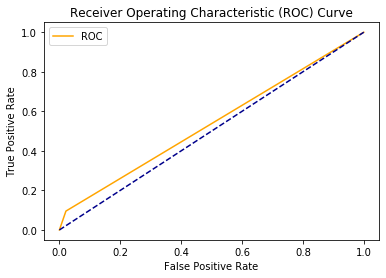

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  63
feature length 66
train length 730
accuracy = 84.7457627118644
confusion matrix [[447  62]
 [ 19   3]]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


total no of queries  68
feature length 134
train length 662
accuracy = 87.38229755178908
confusion matrix [[464  65]
 [  2   0]]
total no of queries  46
feature length 180
train length 616
accuracy = 85.87570621468926
confusion matrix [[447  56]
 [ 19   9]]
total no of queries  35
feature length 215
train length 581
accuracy = 85.68738229755178
confusion matrix [[447  57]
 [ 19   8]]
total no of queries  33
feature length 248
train length 548
accuracy = 86.62900188323917
confusion matrix [[452  57]
 [ 14   8]]
total no of queries  25
feature length 273
train length 523
accuracy = 86.4406779661017
confusion matrix [[450  56]
 [ 16   9]]
total no of queries  16
feature length 289
train length 507
accuracy = 87.1939736346516
confusion matrix [[461  63]
 [  5   2]]
total no of queries  0
feature length 289
train length 507
accuracy = 87.1939736346516
confusion matrix [[461  63]
 [  5   2]]
total no of queries  0
feature length 289
train length 507
accuracy = 87.1939736346516
confusion matr

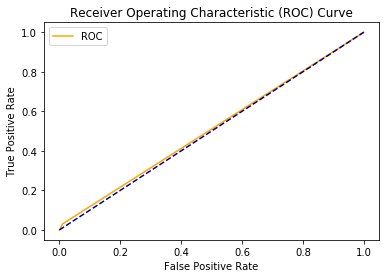

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  66
feature length 69
train length 727
accuracy = 86.25235404896422
confusion matrix [[458  73]
 [  0   0]]
total no of queries  95
feature length 164
train length 632
accuracy = 86.4406779661017
confusion matrix [[446  60]
 [ 12  13]]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


total no of queries  56
feature length 220
train length 576
accuracy = 86.4406779661017
confusion matrix [[451  65]
 [  7   8]]
total no of queries  57
feature length 277
train length 519
accuracy = 86.25235404896422
confusion matrix [[450  65]
 [  8   8]]
total no of queries  28
feature length 305
train length 491
accuracy = 86.25235404896422
confusion matrix [[450  65]
 [  8   8]]
total no of queries  16
feature length 321
train length 475
accuracy = 87.00564971751412
confusion matrix [[451  62]
 [  7  11]]
total no of queries  5
feature length 326
train length 470
accuracy = 87.00564971751412
confusion matrix [[451  62]
 [  7  11]]
total no of queries  1
feature length 327
train length 469
accuracy = 87.00564971751412
confusion matrix [[451  62]
 [  7  11]]
total no of queries  0
feature length 327
train length 469
accuracy = 87.00564971751412
confusion matrix [[451  62]
 [  7  11]]
total no of queries  0
feature length 327
train length 469
accuracy = 87.00564971751412
confusion mat

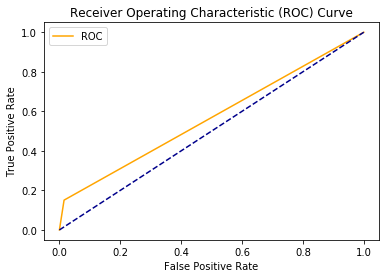

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  59
feature length 62
train length 734
accuracy = 84.36911487758945
confusion matrix [[448  83]
 [  0   0]]
total no of queries  31
feature length 93
train length 703
accuracy = 84.7457627118644
confusion matrix [[448  81]
 [  0   2]]
total no of queries  40
feature length 133
train length 663
accuracy = 84.36911487758945
confusion matrix [[448  83]
 [  0   0]]
total no of queries  34
feature length 167
train length 629
accuracy = 85.87570621468926
confusion matrix [[446  73]
 [  2  10]]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


total no of queries  23
feature length 190
train length 606
accuracy = 86.25235404896422
confusion matrix [[446  71]
 [  2  12]]
total no of queries  4
feature length 194
train length 602
accuracy = 86.06403013182674
confusion matrix [[445  71]
 [  3  12]]
total no of queries  0
feature length 194
train length 602
accuracy = 86.06403013182674
confusion matrix [[445  71]
 [  3  12]]
total no of queries  0
feature length 194
train length 602
accuracy = 86.06403013182674
confusion matrix [[445  71]
 [  3  12]]
total no of queries  0
feature length 194
train length 602
accuracy = 86.06403013182674
confusion matrix [[445  71]
 [  3  12]]
total no of queries  0
feature length 194
train length 602
accuracy = 86.06403013182674
confusion matrix [[445  71]
 [  3  12]]
AUC: 0.5689409423407917


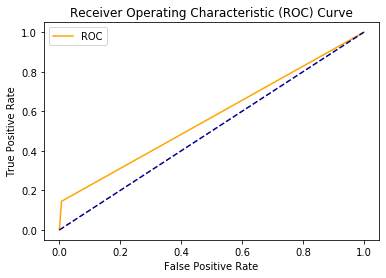

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  103
feature length 106
train length 690
accuracy = 85.87570621468926
confusion matrix [[456  75]
 [  0   0]]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


total no of queries  82
feature length 188
train length 608
accuracy = 85.87570621468926
confusion matrix [[445  64]
 [ 11  11]]
total no of queries  59
feature length 247
train length 549
accuracy = 86.06403013182674
confusion matrix [[440  58]
 [ 16  17]]
total no of queries  27
feature length 274
train length 522
accuracy = 85.31073446327684
confusion matrix [[438  60]
 [ 18  15]]
total no of queries  17
feature length 291
train length 505
accuracy = 85.87570621468926
confusion matrix [[441  60]
 [ 15  15]]
total no of queries  4
feature length 295
train length 501
accuracy = 85.87570621468926
confusion matrix [[442  61]
 [ 14  14]]
total no of queries  3
feature length 298
train length 498
accuracy = 85.87570621468926
confusion matrix [[443  62]
 [ 13  13]]
total no of queries  4
feature length 302
train length 494
accuracy = 85.68738229755178
confusion matrix [[441  61]
 [ 15  14]]
total no of queries  0
feature length 302
train length 494
accuracy = 85.68738229755178
confusion ma

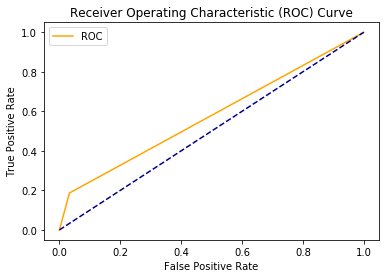

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  80
feature length 83
train length 713
accuracy = 86.4406779661017
confusion matrix [[442  62]
 [ 10  17]]
total no of queries  56
feature length 139
train length 657
accuracy = 85.12241054613936
confusion matrix [[452  79]
 [  0   0]]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


total no of queries  83
feature length 222
train length 574
accuracy = 87.38229755178908
confusion matrix [[441  56]
 [ 11  23]]
total no of queries  42
feature length 264
train length 532
accuracy = 87.94726930320151
confusion matrix [[444  56]
 [  8  23]]
total no of queries  26
feature length 290
train length 506
accuracy = 86.81732580037664
confusion matrix [[447  65]
 [  5  14]]
total no of queries  11
feature length 301
train length 495
accuracy = 86.62900188323917
confusion matrix [[445  64]
 [  7  15]]
total no of queries  5
feature length 306
train length 490
accuracy = 86.62900188323917
confusion matrix [[449  68]
 [  3  11]]
total no of queries  2
feature length 308
train length 488
accuracy = 87.00564971751412
confusion matrix [[447  64]
 [  5  15]]
total no of queries  0
feature length 308
train length 488
accuracy = 87.00564971751412
confusion matrix [[447  64]
 [  5  15]]
total no of queries  0
feature length 308
train length 488
accuracy = 87.00564971751412
confusion ma

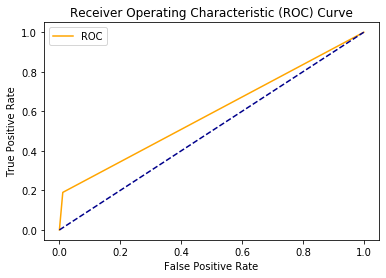

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  92
feature length 95
train length 701
accuracy = 85.31073446327684
confusion matrix [[453  78]
 [  0   0]]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


total no of queries  68
feature length 163
train length 633
accuracy = 82.67419962335217
confusion matrix [[421  60]
 [ 32  18]]
total no of queries  63
feature length 226
train length 570
accuracy = 85.12241054613936
confusion matrix [[432  58]
 [ 21  20]]
total no of queries  22
feature length 248
train length 548
accuracy = 85.87570621468926
confusion matrix [[431  53]
 [ 22  25]]
total no of queries  8
feature length 256
train length 540
accuracy = 85.68738229755178
confusion matrix [[431  54]
 [ 22  24]]
total no of queries  5
feature length 261
train length 535
accuracy = 85.68738229755178
confusion matrix [[432  55]
 [ 21  23]]
total no of queries  0
feature length 261
train length 535
accuracy = 85.68738229755178
confusion matrix [[432  55]
 [ 21  23]]
total no of queries  0
feature length 261
train length 535
accuracy = 85.68738229755178
confusion matrix [[432  55]
 [ 21  23]]
total no of queries  0
feature length 261
train length 535
accuracy = 85.68738229755178
confusion mat

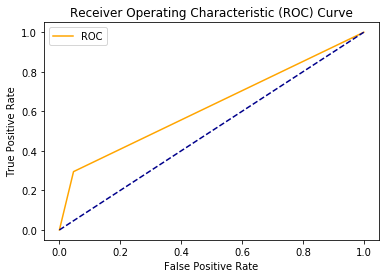

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


total no of queries  123
feature length 126
train length 670
accuracy = 85.49905838041431
confusion matrix [[448  74]
 [  3   6]]
total no of queries  55
feature length 181
train length 615
accuracy = 85.68738229755178
confusion matrix [[447  72]
 [  4   8]]
total no of queries  36
feature length 217
train length 579
accuracy = 84.93408662900188
confusion matrix [[441  70]
 [ 10  10]]
total no of queries  19
feature length 236
train length 560
accuracy = 84.7457627118644
confusion matrix [[440  70]
 [ 11  10]]
total no of queries  9
feature length 245
train length 551
accuracy = 84.7457627118644
confusion matrix [[441  71]
 [ 10   9]]
total no of queries  4
feature length 249
train length 547
accuracy = 84.7457627118644
confusion matrix [[441  71]
 [ 10   9]]
total no of queries  0
feature length 249
train length 547
accuracy = 84.7457627118644
confusion matrix [[441  71]
 [ 10   9]]
total no of queries  0
feature length 249
train length 547
accuracy = 84.7457627118644
confusion matrix

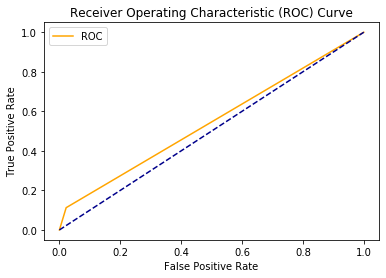

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  64
feature length 67
train length 729
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  47
feature length 114
train length 682
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  19
feature length 133
train length 663
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  8
feature length 141
train length 655
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  2
feature length 143
train length 653
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  0
feature length 143
train length 653
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  0
feature length 143
train length 653
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries 

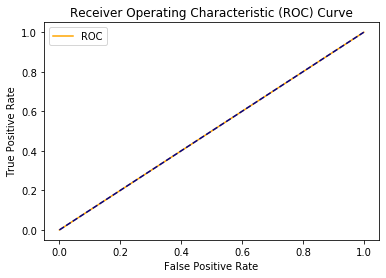

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  80
feature length 83
train length 713
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]
total no of queries  52
feature length 135
train length 661
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


total no of queries  29
feature length 164
train length 632
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]
total no of queries  14
feature length 178
train length 618
accuracy = 86.4406779661017
confusion matrix [[455  66]
 [  6   4]]
total no of queries  4
feature length 182
train length 614
accuracy = 86.4406779661017
confusion matrix [[455  66]
 [  6   4]]
total no of queries  9
feature length 191
train length 605
accuracy = 86.4406779661017
confusion matrix [[455  66]
 [  6   4]]
total no of queries  1
feature length 192
train length 604
accuracy = 87.00564971751412
confusion matrix [[458  66]
 [  3   4]]
total no of queries  0
feature length 192
train length 604
accuracy = 87.00564971751412
confusion matrix [[458  66]
 [  3   4]]
total no of queries  0
feature length 192
train length 604
accuracy = 87.00564971751412
confusion matrix [[458  66]
 [  3   4]]
total no of queries  0
feature length 192
train length 604
accuracy = 87.00564971751412
confusion matrix 

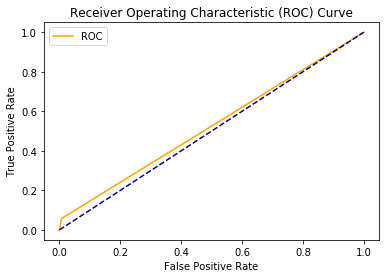

In [8]:
t_rel = 1 # threshold for q_relative criteria
kern = 1.0*RBF(1.0)
auc=[]
ffpr=[]
ttpr=[]

for j in range(10):
    gpc = GaussianProcessClassifier(kernel=kern,random_state=0)

    #dividing the total dataset into 60% training and 40% test
    total_no = len(total_data_objects)
    print("total objects=",total_no)
    train_no=round(0.6*total_no)
    print("train objects=",train_no)
    test_no=round(0.4*total_no)
    print("test objects=",test_no)

    X_test=[]
    Y_test=[]
    train_objects= []

    #for taking two normal and one abnormal as new train to GPClassifier.
    feature_train = []
    label_train = []
    ab=0
    n=0
    
    np.random.shuffle(total_data_objects)
    for i in range(train_no):
        if total_data_objects[i].label == -1 and n < 2:
            feature_train.append(total_data_objects[i].weights_data)
            label_train.append(total_data_objects[i].label)
            n+=1
        elif total_data_objects[i].label == 1 and ab < 1:
            feature_train.append(total_data_objects[i].weights_data)
            label_train.append(total_data_objects[i].label)
            ab+=1
        else :
            train_objects.append(total_data_objects[i])

    for i in range(train_no,total_no):
        X_test.append(total_data_objects[i].weights_data)
        Y_test.append(total_data_objects[i].label)

    feature_train = np.asarray(feature_train)
    label_train = np.asarray(label_train).reshape(-1,1)
    X_test=np.asarray(X_test)
    Y_test=np.asarray(Y_test)

    print("initial feature length",len(feature_train))
    for val in range(10): 
        q=0
        new_objects = []
        # training the objects
        for i in range(len(train_objects)):
            mu_s,cov_s = posterior_predictive(train_objects[i].weights_data.reshape(1,len(train_objects[i].weights_data)), feature_train, label_train) #giving input to gp regression

            q_rel = min(2*abs(mu_s),2/abs(np.sqrt(cov_s)))  # calculating q rel criteria
            if q_rel < t_rel:    # if q_rel is less than given threshold then give the clip to domain expert
                q+=1
                '''
                print("enter label for clip no: ",train_objects[i].clip_no,"with start time ",train_objects[i].stime," end time ",train_objects[i].etime)
                ll = int(input())   # taking input from user(domain_expert)
                '''

                ll=train_objects[i].label
                feature_train = np.vstack([feature_train,train_objects[i].weights_data]) #adding newly labeled sample to training features
                label_train = np.append(label_train,ll)  # adding new label to training labels
            else:
                new_objects.append(train_objects[i])

        gpc.fit(feature_train,label_train)
        pred_labels=gpc.predict(X_test)
        train_objects.clear()
        print("total no of queries ",q)
        train_objects = new_objects.copy()
        print("feature length",len(feature_train))
        print("train length",len(train_objects))

        #performance
        print("accuracy =",accuracy_score(pred_labels,Y_test)*100)
        print("confusion matrix",confusion_matrix(pred_labels,Y_test))

    auc.append(roc_auc_score(Y_test,pred_labels))
    print('AUC:',auc[j])
    fpr, tpr, thresholds = roc_curve(Y_test,pred_labels)
    ffpr.append(fpr)
    ttpr.append(tpr)
    plot_roc_curve(fpr, tpr)

In [9]:
print("avg auc score",np.mean(auc))
#plot_roc_curve(np.mean(ffpr),np.mean(ttpr))

avg auc score 0.5544626529935253


In [10]:
from sklearn.base import BaseEstimator